## 8.8 データの隠れた構造を抽出するクラスタリング

In [28]:
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as doc
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
X, y = ds.make_blobs(n_samples=1000, n_features=2, centers=3)

In [65]:
def relabel(cl):
    """Relabel a clustering with three clusters
    to match the original classes."""
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = no.argmin([np.sum(np.abs(perm[cl] - y)) for perm in perms])
    p = perms[i]
    return p[cl]

In [66]:
def display_clustering(labels, title):
    """Plot the data points with the cluster colors."""
    labels = relabel(labels)
    for i, (c, title) in enumerate(zip(
            [y, labels],["True labels", title])):
        plt.subplot(121 + i)
        plt.scatter(X[:,0],X[:,1],c=c,s=30,linewidths=0,cmap=plt.cm.rainbow)
        plt.xticks([]);plt.yticks([])
        plt.title(title)

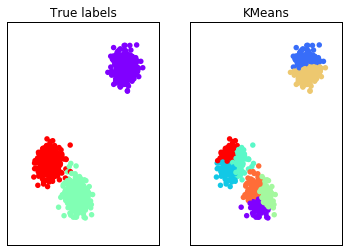

In [67]:
km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_,"KMeans")

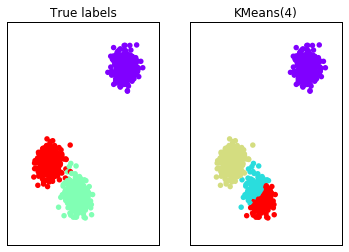

In [80]:
km = clu.KMeans(n_clusters=4) # n_clusters=3だとエラーになる
km.fit(X)
display_clustering(km.labels_,"KMeans(4)")

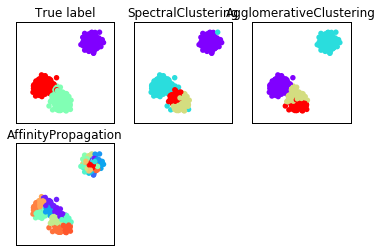

In [78]:
plt.subplot(231)
plt.scatter(X[:,0], X[:,1], c=y, s=30, linewidths=0, cmap=plt.cm.rainbow)
plt.xticks([]);plt.yticks([])
plt.title("True label")
for i, est in enumerate([clu.SpectralClustering(4),
                         clu.AgglomerativeClustering(4),
                         #clu.MeanShift(),
                         clu.AffinityPropagation(),
                         #clu.DBSCAN()
                        ]):
    est.fit(X)
    c = relabel(est.labels_)
    plt.subplot(232 + i)
    plt.scatter(X[:,0], X[:,1], c=c, s=30, linewidths=0, cmap=plt.cm.rainbow)
    plt.xticks([]);plt.yticks([])
    plt.title(est.__class__.__name__)

* K平均法
 * https://ja.wikipedia.org/wiki/K平均法
* EMアルゴリズム
 * https://ja.wikipedia.org/wiki/EMアルゴリズム
* scikit-learn
 * http://scikit-learn.org/stable/modules/clustering.html